In [1]:
import numpy as np
import matplotlib.pyplot as plt
f = open('rpn_inference_time_distribution.txt', 'r')
lines = f.readlines()

In [2]:
height = 100
width = len([x for x in lines[0].split()])
data = np.empty((height,width))
avg_data = np.zeros((16,width))
for i in range(0,16):
    offset = i*100
    for j in range(height):
        data[j] = [float(x) for x in lines[offset+1+j].split()]
    
    #print(data)
    for j in range(1,height):
        #print(data[j][1:])
        avg_data[i] = avg_data[i] + data[j]
    avg_data[i] = avg_data[i]/(height-1)
    #print(avg_data[i])
print(avg_data)

[[0.07254792 0.00049182 0.00058066 0.00032773 0.07114071]
 [0.07011291 0.0004493  0.00052988 0.00029202 0.06883588]
 [0.06945658 0.00049871 0.00058988 0.0003444  0.06801707]
 [0.06998776 0.00049551 0.00056517 0.00032292 0.068598  ]
 [0.07244914 0.00051637 0.00057612 0.00032181 0.07102817]
 [0.07162417 0.00050502 0.00058145 0.00032698 0.07020359]
 [0.06465275 0.00049943 0.00055553 0.00031854 0.06327206]
 [0.0730584  0.00048545 0.00055627 0.00031665 0.07169403]
 [0.06617586 0.00048808 0.00054849 0.00031634 0.06481718]
 [0.06915474 0.00052024 0.00056746 0.00032573 0.067735  ]
 [0.07195259 0.00049784 0.00055921 0.00032177 0.07056768]
 [0.07160689 0.00050173 0.00059494 0.00032774 0.07017559]
 [0.07085295 0.00050954 0.00057637 0.00032226 0.06943849]
 [0.06613438 0.00053455 0.00060947 0.00034063 0.06464334]
 [0.07128661 0.00052464 0.00057918 0.0003294  0.0698452 ]
 [0.07263776 0.00051673 0.00057297 0.00032867 0.07121309]]


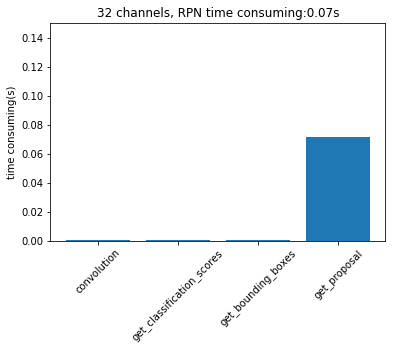

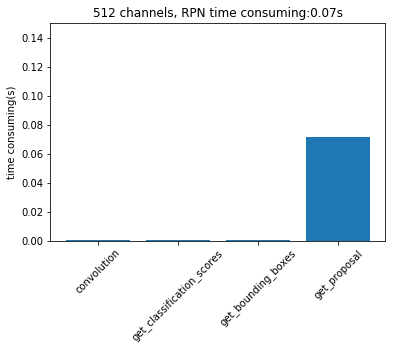

In [3]:
names = [x for x in lines[0].split()]
names = names[1:]
#print(names)
for i in [0,15]: 
    x = range(width-1)
    plt.bar(x,avg_data[i][1:])
    plt.ylim(0,0.150)
    plt.xticks(x,names,rotation = 45)
    plt.ylabel('time consuming(s)')
    plt.title(str((i+1)*32)+' channels, RPN time consuming:'+'%.2f' %avg_data[i][0]+'s')
    plt.savefig('RPN_time_distribution_'+str((i+1)*32)+'channels.png',bbox_inches='tight')
    plt.show()

[0.07254792 0.07011291 0.06945658 0.06998776 0.07244914 0.07162417
 0.06465275 0.0730584  0.06617586 0.06915474 0.07195259 0.07160689
 0.07085295 0.06613438 0.07128661 0.07263776]


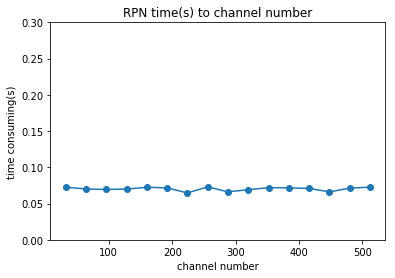

In [4]:
#names = [x for x in lines[0].split()]
x = range(32,512+32,32)
print(avg_data[:,0])
plt.plot(x,avg_data[:,0],marker = 'o')
plt.ylim(0,0.3)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('RPN time(s) to channel number')
plt.savefig('RPN_time_to_channel_number.png',bbox_inches='tight')
plt.show()